In [1]:
import gym # para elegir el ambiente en el cual entrenaremos el agente.
import sys

import pandas as pd # para disponer de la data de forma mas organizada.
import matplotlib.pyplot as plt # para mostrar gráficos.
import numpy as np #para el procesamiento de números.

np.random.seed(666)

%matplotlib inline

from collections import defaultdict #utilizaremos un defaultdict como base
# en la cual guardaremos el valor que tendrá cada una de nuestras acciones.
from utils import e_greedy

In [2]:
env = gym.make('FrozenLake-v0') #este es el ambiente que utilizaremos,
# puedes buscar como funciona en la documentación.

In [3]:
numero_de_acciones = env.action_space.n
Q = defaultdict(lambda: np.zeros(numero_de_acciones)) #se define nuestra base como un diccionario anidado con cada acción 
#que podría tomar el agente.
decay = 0.0000042
decay = 1 - decay #este valor será por el cual decaerá nuestro epsilon en cada episodio. 
alpha = 0.0005 #nuestro valor de "media movil" se verá afectado por esta variable. 
lambd = 0.9 #variable lambda de TD(lambda).
gamma = 0.95 #variable por la cual verá reducido la elegibilidad de cada estado.

episode = 0
total_reward = 0
eps = epsilon = 1 # valor de epsilon inicial
eps_list = list() #variable que almacenará los valores de epsilon.
reward_list = [] #variable que almacenará los valores de recompensa.

In [4]:
for numb_iter in range(1, 1200001):
    estado_anterior = env.reset()
    epsilon= eps*decay**episode  
    reward_list.append(total_reward)
    total_reward = 0
    episode += 1
    actions_prob = e_greedy(Q, epsilon, numero_de_acciones, estado_anterior) #variable que almacenará la probabilidad de realizar cada acción. 
    selected_next_action = np.argmax(np.random.multinomial(1, actions_prob)) #se elige la acción.
    counter_state_actions = set() #esta variable almacenará cada que accion se realice por cada episodio.
    elegibilidad = defaultdict(lambda: np.zeros(numero_de_acciones)) 
    while True:   
        for ob, ac in counter_state_actions:
            elegibilidad[ob][ac]  *= lambd* gamma 
        elegibilidad[estado_anterior][selected_next_action] += 1.0
        obs, temporal_reward, final, _ = env.step(selected_next_action)
        counter_state_actions.add((estado_anterior, selected_next_action))
        selected_action = selected_next_action
        actions_prob = e_greedy(Q, epsilon, numero_de_acciones, obs) #variable que almacenará la probabilidad de realizar cada acción. 
        selected_next_action = np.argmax(np.random.multinomial(1, actions_prob)) #se elige la acción.   
        td_error = temporal_reward + gamma * Q[obs][selected_next_action] - Q[estado_anterior][selected_action]
        for ob, ac in counter_state_actions:
            Q[ob][ac] += alpha * td_error * elegibilidad[ob][ac]
        estado_anterior = obs
        total_reward += temporal_reward
        if final:
            if episode % 100000 == 0:
                print(f'Número de Episodios Realizados: {episode}')           
            eps_list.append(epsilon)
            break

Número de Episodios Realizados: 100000
Número de Episodios Realizados: 200000
Número de Episodios Realizados: 300000
Número de Episodios Realizados: 400000
Número de Episodios Realizados: 500000
Número de Episodios Realizados: 600000
Número de Episodios Realizados: 700000
Número de Episodios Realizados: 800000
Número de Episodios Realizados: 900000
Número de Episodios Realizados: 1000000
Número de Episodios Realizados: 1100000
Número de Episodios Realizados: 1200000


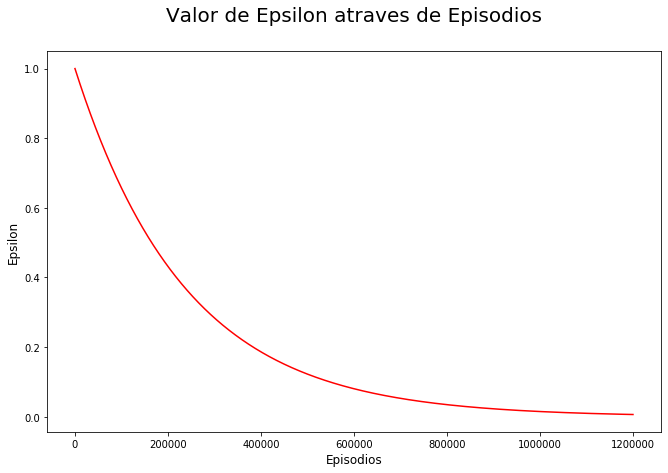

In [5]:
plt.figure(figsize=(11,7)) 
plt.title('Valor de Epsilon atraves de Episodios', fontsize=20, pad=30)
plt.xlabel('Episodios', fontsize=12)
plt.ylabel('Epsilon', fontsize=12)

plt.plot(eps_list, color='r')

In [6]:
df = pd.DataFrame({'Reward': reward_list})

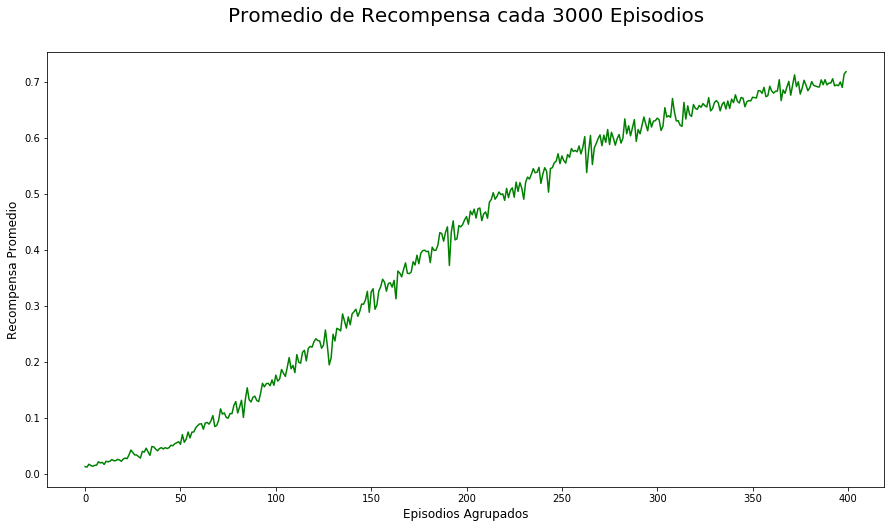

In [7]:
plt.figure(figsize=(15,8)) 
plt.title('Promedio de Recompensa cada 3000 Episodios', fontsize=20, pad=30)
plt.xlabel('Episodios Agrupados', fontsize=12)
plt.ylabel('Recompensa Promedio', fontsize=12)
plt.plot(df.groupby(df.index //3000)['Reward'].mean(), color='g')

In [8]:
Q

defaultdict(<function __main__.<lambda>()>,
            {0: array([0.18753272, 0.16303301, 0.16424694, 0.15725092]),
             4: array([0.21572298, 0.14643064, 0.13433486, 0.11745589]),
             8: array([0.14581007, 0.20144813, 0.18481917, 0.27952897]),
             9: array([0.24278947, 0.38202022, 0.28372275, 0.20800132]),
             13: array([0.26905084, 0.37320843, 0.49948052, 0.34030671]),
             12: array([0., 0., 0., 0.]),
             5: array([0., 0., 0., 0.]),
             1: array([0.07859708, 0.08025158, 0.07692168, 0.15240551]),
             2: array([0.15192936, 0.1159879 , 0.1203912 , 0.11023901]),
             6: array([0.15570078, 0.11434189, 0.17382195, 0.04083498]),
             3: array([0.03431668, 0.03796882, 0.02926956, 0.11614215]),
             10: array([0.40970944, 0.34018837, 0.27315429, 0.16378526]),
             14: array([0.50328325, 0.72081304, 0.69117287, 0.61118435]),
             15: array([0., 0., 0., 0.]),
             7: array([0.